# Excercise 2 - Regularized Logistic regression

In [1]:
import numpy as np
import pandas as pd
import scipy.optimize as opt
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 6,5

In [2]:
# Load data from file
data = pd.read_csv('ex2data2.txt', header=None, names=['Test 1', 'Test 2', 'Accepted'])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Visualizing the data

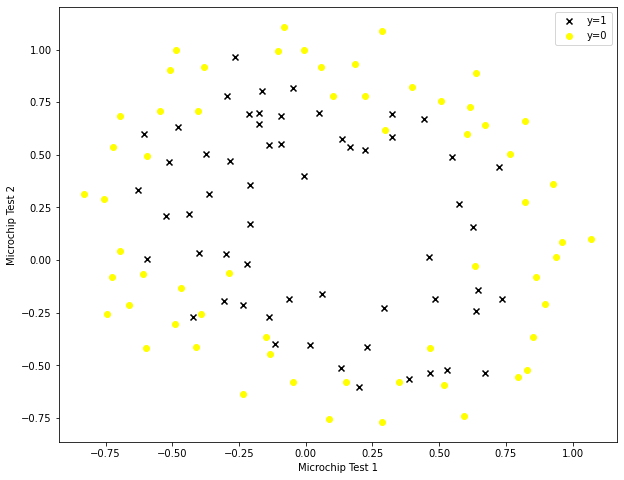

In [3]:
# Find all data points with positive and negative accepted results respectively
pos = data[data['Accepted'].isin([1])]
neg = data[data['Accepted'].isin([0])]

# Plot data
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pos['Test 1'], pos['Test 2'], marker='x', color='black', label='y=1')
ax.scatter(neg['Test 1'], neg['Test 2'], marker='o', color='yellow', label='y=0')
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
ax.legend()

Feature mapping

In [4]:
def map_feature(X1, X2):
    degree = 6
    out = np.ones((X1.size, 1))

    # NOTE: +1 because of differences in Python not counting last number in range
    for i in range(1, degree+1, 1):
        for j in range(0, i+1, 1):
            tmp = np.multiply((X1**(i-j)),  (X2**j))
            tmp = tmp.reshape((X1.size, 1))
            out = np.hstack([out, tmp])

    return out

X = map_feature(data['Test 1'].values, data['Test 2'].values)
y = data['Accepted'].values

m, n = X.shape

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# NOTE: Old cost and grad functions written by me
def cost_fn_reg_old(theta, X, y, learning_rate):
    h = sigmoid(X @ theta)
    reg = learning_rate/(2*m) * np.sum(np.power(theta[1:n], 2))
    J = (1/m)*np.sum(np.multiply(-y,np.log(h)) - np.multiply(1-y,np.log(1-h))) + reg
    return J

def grad_fn_reg_old(theta, X, y, learning_rate):
    h = sigmoid(np.dot(X, theta))
    grad = np.zeros((n, 1))
    for i in range(n):
        error = np.subtract(h,y)
        x_col = X[:,i]
        grad[i] = (1/m) * np.sum(np.multiply(error, x_col)) + learning_rate/m * theta[i]
    
    grad[0] = (1/m) * np.sum(np.multiply(h-y, X[:,0]))
    return grad

In [6]:
lam = 1
initial_theta = np.zeros((n,1))

initial_theta = initial_theta.flatten()
y = y.flatten()

cost = cost_fn_reg_old(initial_theta, X, y, lam)
grad = grad_fn_reg_old(initial_theta, X, y, lam)

print('Cost at initial theta (zeros): %f\n', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:')
for i in range(5):
    print(' %.4f' % grad[i])
print('Expected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')


Cost at initial theta (zeros): %f
 0.6931471805599454
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



*Note: Testing code from [Analytics Vidhya](https://medium.com/analytics-vidhya/python-implementation-of-andrew-ngs-machine-learning-course-part-2-2-dceff1a12a12) to try to understand why fmin_tnc is not converging at the right values later...*

In [7]:
def cost_fn_reg(theta, X, y, lam):
    m = len(y)
    h = sigmoid(X @ theta)
    J = (-1/m) * (y.T @ np.log(h) + (1 - y.T) @ np.log(1-h))
    reg = (lam/(2*m)) * (theta[1:] @ theta[1:])
    return J + reg

def grad_fn_reg(theta, X, y, lam):
    m = len(y)
    h = sigmoid(X @ theta)
    grad = (1/m) * X.T @ (h - y)
    grad[1:] = grad[1:] + (lam/m) * theta[1:]
    return grad

Test cost and gradient functions

In [8]:
# initial_theta = initial_theta.flatten()
# y = y.flatten()

cost = cost_fn_reg(initial_theta, X, y, lam)
grad = grad_fn_reg(initial_theta, X, y, lam)

print('Cost at initial theta (zeros): %f\n', cost)
print('Expected cost (approx): 0.693')
print('Gradient at initial theta (zeros) - first five values only:')
for i in range(5):
    print(' %.4f' % grad[i])
print('Expected gradients (approx) - first five values only:')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')


Cost at initial theta (zeros): %f
 0.6931471805599454
Expected cost (approx): 0.693
Gradient at initial theta (zeros) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115
Expected gradients (approx) - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115



Regularization and accuracies

*NOTE: for some reason `opt.fmin_tnc` is failing to converge at the optimum values for theta even though cost and gradient functions are calculating correctly*

In [9]:
lam = 10
initial_theta = np.zeros((n,1))
res = opt.fmin_tnc(func = cost_fn_reg_old, x0=initial_theta, fprime=grad_fn_reg_old, args=(X,y, lam))
theta_opt = res[0]

cost = cost_fn_reg(res[0], X, y, lam)

print('Cost at test theta (with lambda = 10): %.2f' % cost)
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only:')
for i in range(5):
    print(' %.4f' % grad[i])
print('Expected gradients (approx) - first five values only:')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

Cost at test theta (with lambda = 10): 0.65
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



In [10]:
lam = 10
initial_theta = np.zeros((n,1))
res = opt.fmin_tnc(func = cost_fn_reg, x0=initial_theta, fprime=grad_fn_reg, args=(X,y, lam))
theta_opt = res[0]

cost = cost_fn_reg(res[0], X, y, lam)

print('Cost at test theta (with lambda = 10): %.2f' % cost)
print('Expected cost (approx): 3.16')
print('Gradient at test theta - first five values only:')
for i in range(5):
    print(' %.4f' % grad[i])
print('Expected gradients (approx) - first five values only:')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

Cost at test theta (with lambda = 10): 0.65
Expected cost (approx): 3.16
Gradient at test theta - first five values only:
 0.0085
 0.0188
 0.0001
 0.0503
 0.0115
Expected gradients (approx) - first five values only:
 0.3460
 0.1614
 0.1948
 0.2269
 0.0922



In [11]:
lam = 1
res = opt.fmin_tnc(func = cost_fn_reg, x0=initial_theta, fprime=grad_fn_reg, args=(X,y, lam))
theta_opt = res[0]

cost = cost_fn_reg(res[0], X, y, lam)
cost

0.5290027299645101

In [12]:
pred = [sigmoid(X @ theta_opt) >= 0.5]
accuracy = np.mean(pred == y.flatten()) * 100

print('Train Accuracy: %.2f' % accuracy)

Train Accuracy: 83.05


Plot decision boundary

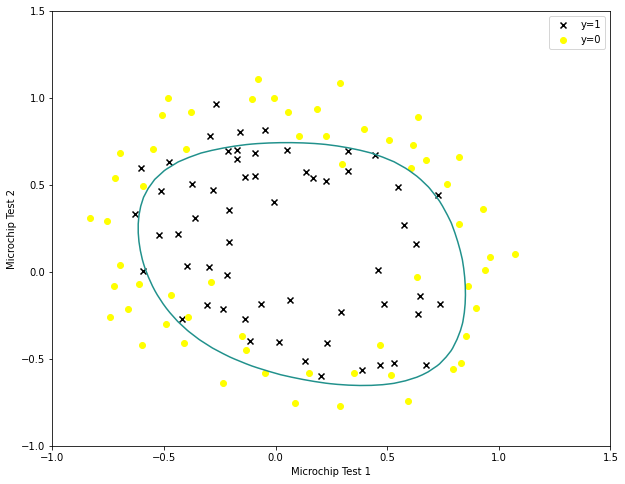

In [13]:
# Plot data
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pos['Test 1'], pos['Test 2'], marker='x', color='black', label='y=1')
ax.scatter(neg['Test 1'], neg['Test 2'], marker='o', color='yellow', label='y=0')

# Calculate and plot boundary
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)
z = np.zeros((len(u), len(v)))

def map_feature_for_plotting(X1, X2):
    degree = 6
    out = np.ones(1)
    for i in range(1, degree+1):
        for j in range(i+1):
            out = np.hstack((out, np.multiply(np.power(X1, 1-j), np.power(X2, j))))
    return out

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.dot(map_feature(u[i], v[j]), theta_opt)

plt.contour(u,v,z,0)

ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
ax.legend()